Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


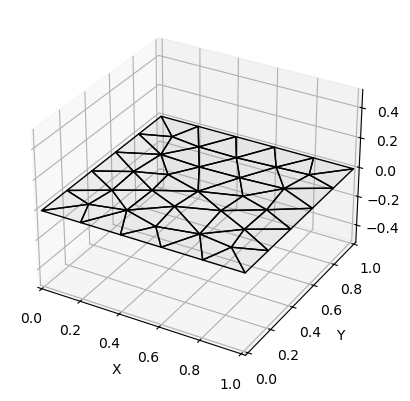

In [1]:
# %%
import numpy as np
from scipy.spatial import Delaunay, minkowski_distance
import meshio
import pygmsh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from icosphere import icosphere
from mesh import Mesh

with pygmsh.geo.Geometry() as geom:
    geom.add_rectangle(0.0, 1.0, 0.0, 1.0, 0.0, mesh_size=0.2)
    mesh = geom.generate_mesh()

points = mesh.points
simplices = mesh.cells_dict['triangle']
point_normals = np.array([[0,0,1]]*len(simplices))
mesh = Mesh(points, simplices, point_normals)

'''
nseg, points, point_normals, simplices = 5, [], [], []
for i in range(nseg+1):
    for j in range(nseg+1):
        points.append([i/nseg,j/nseg,0])
        point_normals.append([0,0,1])
points = np.array(points)
point_normals = np.array(point_normals)
for i in range(nseg):
    for j in range(nseg):
        k = i+j*(nseg+1)
        simplices.append([0+k,1+k,1+(1+nseg)+k,(1+nseg)+k])

mesh = Mesh(points, simplices, point_normals)
'''

#points, simplices = icosphere(7)
#point_normals = points / np.linalg.norm(points,axis=-1,keepdims=True)
#mesh = Mesh(points, simplices, point_normals)

if len(simplices) < 30000:
    # Setup for a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot each simplex
    for simplex in simplices:
        polygon = points[simplex]
        ax.add_collection3d(Poly3DCollection([polygon], facecolors='grey', linewidths=1, edgecolors='k', alpha=.1))

    # Set plot display parameters
    #ax.scatter(points[:,0], points[:,1], points[:,2], color='k')  # Plot the points
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Adjusting the scale for better visualization
    max_range = np.array([points[:,0].max()-points[:,0].min(), 
                        points[:,1].max()-points[:,1].min(), 
                        points[:,2].max()-points[:,2].min()]).max() / 2.0
    mid_x = (points[:,0].max()+points[:,0].min()) * 0.5
    mid_y = (points[:,1].max()+points[:,1].min()) * 0.5
    mid_z = (points[:,2].max()+points[:,2].min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    plt.show()

In [2]:
# %% Init
# \phi = x^2 + y^2 + (xy)^2
xc = mesh.barycenters[:,0]
yc = mesh.barycenters[:,1]
zc = mesh.barycenters[:,2]

xf = mesh.edge_centers[:,0]
yf = mesh.edge_centers[:,1]
zf = mesh.edge_centers[:,2]

#uf = np.array([-10*xf*(1.0-xf)*np.abs(xf-0.5), -10*yf*(1.0-yf)*(yf-0.5), 0*zf]).T
#mass_flux_rate = np.einsum("ij,ij->i",uf, mesh.edge_normals)
mass_flux_rate = np.random.rand(*(len(xf),))-0.5 # uf
mass_flux_rate[np.array(mesh.neighbours)==-1] = 0.0

mass_flux = mass_flux_rate[:, np.newaxis] * mesh.edge_normals
for _ in range(1):
    mass_flux_rate, div = mesh.helmholtz_projection(mass_flux_rate)
    print(max(div), min(div))

mass_flux_new = mass_flux_rate[:, np.newaxis] * mesh.edge_normals


1.3994406411867513e-06 -1.4407163690319247e-06


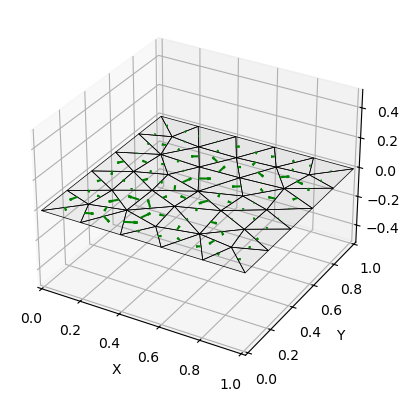

In [3]:
if len(simplices) < 30000:
    # Setup for a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot each simplex
    for simplex in simplices:
        polygon = points[simplex]
        ax.add_collection3d(Poly3DCollection([polygon], facecolors='grey', linewidths=.5, edgecolors='k', alpha=.1))

    # Set plot display parameters
    #ax.scatter(points[:,0], points[:,1], points[:,2], color='k')  # Plot the points
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Adjusting the scale for better visualization
    max_range = np.array([points[:,0].max()-points[:,0].min(), 
                        points[:,1].max()-points[:,1].min(), 
                        points[:,2].max()-points[:,2].min()]).max() / 2.0
    mid_x = (points[:,0].max()+points[:,0].min()) * 0.5
    mid_y = (points[:,1].max()+points[:,1].min()) * 0.5
    mid_z = (points[:,2].max()+points[:,2].min()) * 0.5
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    
    #ax.quiver(xf, yf, zf, mass_flux[:,0], mass_flux[:,1], mass_flux[:,2], color='m',length=0.2)
    ax.quiver(xf, yf, zf, mass_flux_new[:,0], mass_flux_new[:,1], mass_flux_new[:,2], color='g',length=0.2)
    
    plt.show()

In [4]:
print(mesh.edge_lengths)

[0.21354753 0.20331741 0.2543616  0.19614778 0.1858178  0.18626138
 0.18519308 0.20837031 0.20093311 0.20756514 0.17044548 0.21493067
 0.19368053 0.19045077 0.18529812 0.17533871 0.1929556  0.18305849
 0.18716624 0.15490633 0.16090576 0.19323056 0.2        0.19784816
 0.18778651 0.2        0.19836764 0.20000891 0.2        0.1861756
 0.19797807 0.18734004 0.2040978  0.1831433  0.2        0.169637
 0.16230863 0.21683121 0.21935745 0.2        0.21592613 0.20563036
 0.2        0.19700686 0.19624583 0.2        0.19675629 0.19664081
 0.19017509 0.19664007 0.19763944 0.19991904 0.2        0.19682763
 0.18863691 0.18618297 0.2        0.20593994 0.22125701 0.2
 0.18495107 0.190831   0.2        0.20465792 0.219542   0.2
 0.20679904 0.19270264 0.19655851 0.19650755 0.18747028 0.19710632
 0.2        0.15590961 0.20705524 0.2        0.15590961 0.20705524
 0.2        0.15590961 0.20705524 0.2        0.15590961 0.2
 0.15590961 0.2        0.15590961 0.2        0.15590961 0.20705524
 0.2        0.15590